In [47]:
import tensorflow as tf    
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [48]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


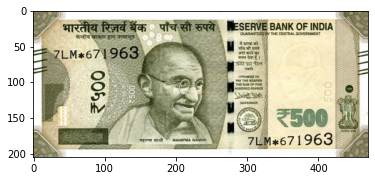

In [49]:
img=image.load_img('Dataset/Training/Real/44.jpg')
plt.imshow(img)

In [50]:
cv2.imread('Dataset/Training/Real/44.jpg')

array([[[113, 149, 149],
        [ 78, 114, 114],
        [ 70, 106, 106],
        ...,
        [ 68, 108, 106],
        [ 68, 108, 106],
        [ 87, 127, 125]],

       [[103, 139, 139],
        [ 83, 119, 119],
        [ 82, 118, 118],
        ...,
        [ 64, 104, 102],
        [ 69, 109, 107],
        [ 97, 137, 135]],

       [[ 79, 114, 117],
        [ 81, 116, 119],
        [ 86, 121, 124],
        ...,
        [ 75, 114, 112],
        [ 69, 108, 106],
        [ 72, 111, 109]],

       ...,

       [[ 98, 135, 143],
        [ 73, 110, 118],
        [ 90, 126, 132],
        ...,
        [ 94, 129, 132],
        [ 90, 125, 129],
        [102, 137, 141]],

       [[ 84, 121, 129],
        [ 73, 110, 118],
        [104, 140, 146],
        ...,
        [ 91, 126, 129],
        [ 85, 120, 124],
        [ 89, 124, 128]],

       [[ 66, 105, 113],
        [ 66, 103, 111],
        [ 91, 127, 133],
        ...,
        [ 82, 117, 120],
        [ 83, 118, 121],
        [ 81, 116, 119]]

In [51]:
cv2.imread('Dataset/Training/Real/44.jpg').shape


(205, 470, 3)

In [52]:
train=ImageDataGenerator(rescale=1/255)
train=ImageDataGenerator(rescale=1/255)

In [53]:
train_dataset=train.flow_from_directory('dataset/training/',
                                     target_size=(200,200),
                                     batch_size=3,
                                     class_mode='binary')

validation_dataset=train.flow_from_directory('dataset/validation/',
                                     target_size=(200,200),
                                     batch_size=3,
                                     class_mode='binary')

Found 35 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [54]:
train_dataset.class_indices

{'Fake': 0, 'Real': 1}

In [55]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                 tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

In [57]:
from tensorflow.keras import optimizers

In [58]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [72]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=50,
                   validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 1s 512ms/step - loss: 0.2485 - accuracy: 0.8889 - val_loss: 0.4296 - val_accuracy: 0.8571
Epoch 2/50
3/3 [==============================] - 1s 484ms/step - loss: 1.5173 - accuracy: 0.4444 - val_loss: 0.2869 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 2s 531ms/step - loss: 0.3930 - accuracy: 0.8750 - val_loss: 0.4449 - val_accuracy: 0.8571
Epoch 4/50
3/3 [==============================] - 2s 506ms/step - loss: 0.2597 - accuracy: 0.8889 - val_loss: 1.1714 - val_accuracy: 0.7143
Epoch 5/50
3/3 [==============================] - 1s 512ms/step - loss: 0.4917 - accuracy: 0.8889 - val_loss: 0.7750 - val_accuracy: 0.4286
Epoch 6/50
3/3 [==============================] - 2s 514ms/step - loss: 0.6565 - accuracy: 0.6250 - val_loss: 0.2720 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 1s 489ms/step - loss: 0.2474 - accuracy: 1.0000 - val_loss: 0.2178 - val_accuracy: 1.0000
Epoch 8/50
3/3 [====

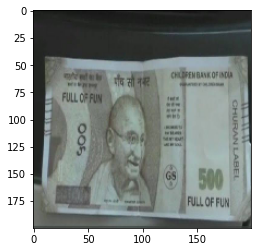

1/1 [==============================] - 0s 21ms/step
Fake


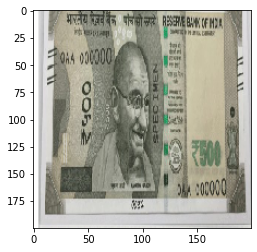

1/1 [==============================] - 0s 24ms/step
Fake


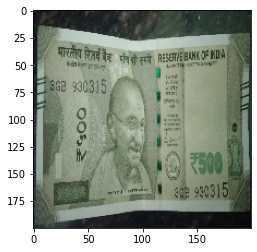

1/1 [==============================] - 0s 26ms/step
Real


In [74]:
dir_path='Dataset\Testing'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200,200,3))
    
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    x=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    images=images.reshape(1,200,200,3)
    val=model.predict(images)
    if(val==0):
        print("Fake")
    else:
        print("Real")
        